# Predicting Earnings from Census Data
## Compiled By: Dana Hagist

### Project and Solutions Sourced From: Analytics Edge

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Adult

The file census.csv contains 1994 census data for 31,978 individuals in the United States.

The dataset includes the following 13 variables:

- age = the age of the individual in years
- workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
- education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
- maritalstatus = the marital status of the individual
- occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
- relationship = relationship of individual to his/her household
- race = the individual's race
- sex = the individual's sex
- capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
- capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
- hoursperweek = the number of hours the individual works per week
- nativecountry = the native country of the individual
- over50k = whether or not the individual earned more than $50,000 in 1994

### Problem 1.1 - A Logistic Regression Model


Let's begin by building a logistic regression model to predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables. First, read the dataset census.csv into R.

Then, split the data randomly into a training set and a testing set, setting the seed to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

Next, build a logistic regression model to predict the dependent variable "over50k", using all of the other variables in the dataset as independent variables. Use the training set to build the model.

In [1]:
# Solution:
setwd('C:/Users/a83644/Documents/Coursework/Analytics Edge/Predicting Earnings from Census')
census = read.csv("census.csv")

# Need to split the data. Load caTools package, and set seed to 2000:

library(caTools)

set.seed(2000)

#Split the data set according to the over50k variable:

spl = sample.split(census$over50k, SplitRatio = 0.6)

train = subset(census, spl==TRUE)

test = subset(census, spl==FALSE)

# Build the logistic regression model:

censusglm = glm( over50k ~ . , family="binomial", data = train)

#Look at the model summary to identify the significant factors:

summary(censusglm)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = over50k ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                      

### Problem 1.2 - A Logistic Regression Model

What is the accuracy of the model on the testing set? Use a threshold of 0.5. (You might see a warning message when you make predictions on the test set - you can safely ignore it.)

In [2]:
# Solution: 
#Generate the predictions for the test set:

predictTestglm = predict(censusglm, newdata = test, type = "response")

#Then we can generate the confusion matrix:

table(test$over50k, predictTestglm >= 0.5)

#If we divide the sum of the main diagonal by 
# the sum of all of the entries in the matrix, we obtain the accuracy:

(9051+1888)/(9051+662+1190+1888)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

[1] 0.8552107

### Problem 1.3 - A Logistic Regression Model

What is the baseline accuracy for the testing set?

In [3]:
# Solution
table(train$over50k)
table(test$over50k)
9713/(9713+3078)


 <=50K   >50K 
 14570   4617 


 <=50K   >50K 
  9713   3078 

[1] 0.7593621

Most frequent outcome is <=50k, so that would be the baseline prediction.

Baseline accuracy is 76% as calculated above.

### Problem 1.4 - A Logistic Regression Model

What is the area-under-the-curve (AUC) for this model on the test set?

In [4]:
# Install necessary package
install.packages('ROCR', repos='http://cran.us.r-project.org')
library(ROCR)

also installing the dependencies 'gtools', 'gdata', 'gplots'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.4.4"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.4"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [5]:
# Solution:
# Compute the AUC

ROCRpred <- prediction(predictTestglm, test$over50k)

as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.9061598

### Problem 2.1 - A CART Model

We have just seen how the logistic regression model for this data achieves a high accuracy. Moreover, the significances of the variables give us a way to gauge which variables are relevant for this prediction task. However, it is not immediately clear which variables are more important than the others, especially due to the large number of factor variables in this problem.

Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use the default parameters, so don't set a value for minbucket or cp. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.

Determine how many splits the tree has in total

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.4.4"Warning message:
"package 'rpart.plot' was built under R version 3.4.4"

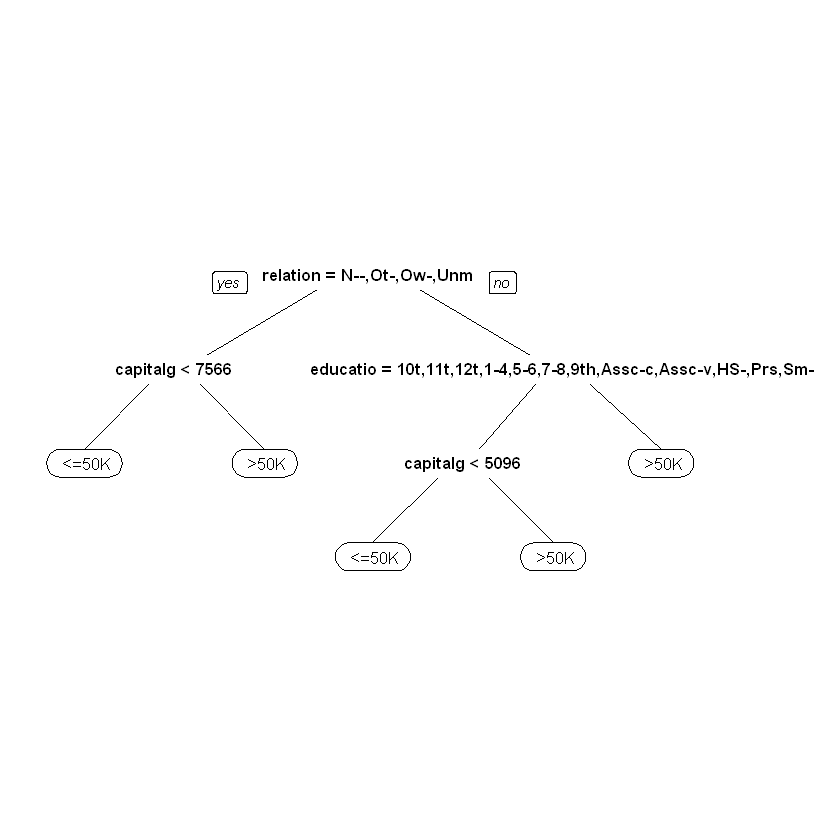

In [6]:
# Solution:
# Load the rpart and rpart.plot packages:
install.packages('rpart', repos='http://cran.us.r-project.org')
install.packages('rpart.plot', repos='http://cran.us.r-project.org')
library(rpart)
library(rpart.plot)

# Estimate the CART tree:

censustree = rpart( over50k ~ . , method="class", data = train)

# Plot the tree:

prp(censustree)

#There are four splits in total.

### Problem 2.2 - A CART Model

Which variable does the tree split on at the first level (the very first split of the tree)?

Solution: Very first split on the tree is relationship.

### Problem 2.3 - A CART Model

Which variables does the tree split on at the second level (immediately after the first split of the tree)?

Solution: Second level splits include capitalgain and education.

### Problem 2.4 - A CART Model

What is the accuracy of the model on the testing set? Use a threshold of 0.5. (You can either add the argument type="class", or generate probabilities and use a threshold of 0.5 like in logistic regression.)
unanswered

Solution: (see code cell below) 84.74% 

This highlights a very regular phenomenon when comparing CART and logistic regression. CART often performs a little worse than logistic regression in out-of-sample accuracy. However, as is the case here, the CART model is often much simpler to describe and understand. 

In [7]:
# Generate predictions on the test set using the CART tree:

predictTestcart = predict(censustree, newdata = test, type = "class")

# Create the confusion matrix:

table(test$over50k, predictTestcart)

# Compute accuracy, sum diagonal entries and divide by sum of all terms:

(9243+1596)/(9243+470+1482+1596)

        predictTestcart
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

[1] 0.8473927

### Problem 2.5 - A CART Model

Let us now consider the ROC curve and AUC for the CART model on the test set. You will need to get predicted probabilities for the observations in the test set to build the ROC curve and compute the AUC. Remember that you can do this by removing the type="class" argument when making predictions, and taking the second column of the resulting object.

Plot the ROC curve for the CART model you have estimated. Observe that compared to the logistic regression ROC curve, the CART ROC curve is less smooth than the logistic regression ROC curve. Which of the following explanations for this behavior is most correct? (HINT: Think about what the ROC curve is plotting and what changing the threshold does.)

Solution: The probabilities from the CART model take only a handful of values (five, one for each end bucket/leaf of the tree); the changes in the ROC curve correspond to setting the threshold to one of those values.  Stated differently, the breakpoints of the curve correspond to the false and true positive rates when the threshold is set to the five possible probability values. 

,<=50K,>50K
2,0.2794982,0.72050176
5,0.2794982,0.72050176
7,0.9490143,0.05098572
8,0.6972807,0.30271934
11,0.6972807,0.30271934
12,0.2794982,0.72050176


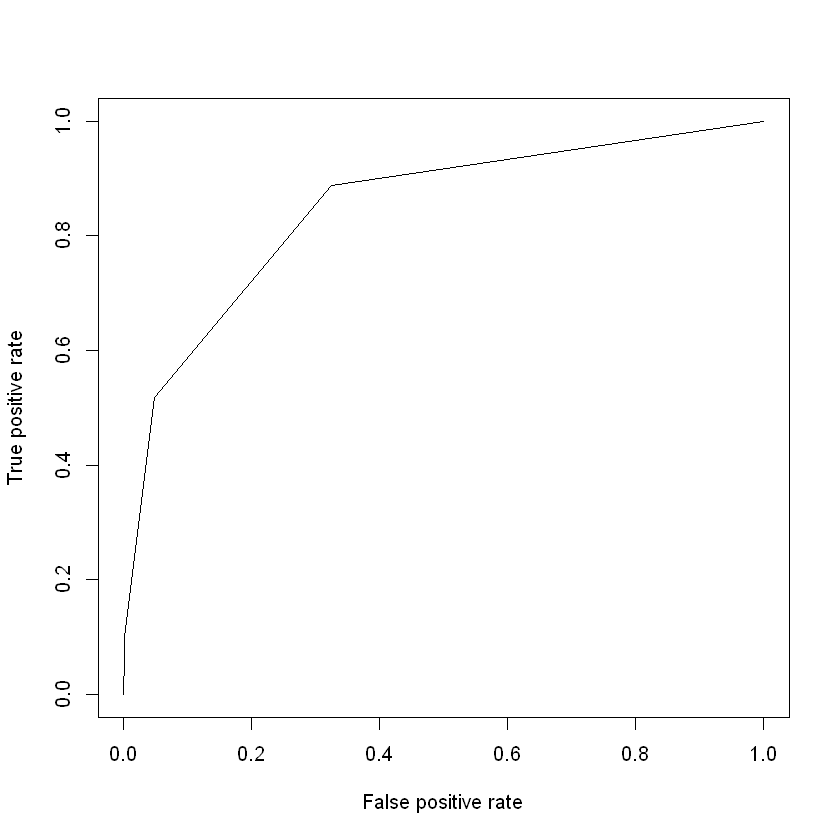

In [8]:
# Solution:
predictTestcart2 <- predict(censustree,newdata = test)
head(predictTestcart2)

ROCRpred_cart2 <- prediction(predictTestcart2[,2],test$over50k)
perf = performance(ROCRpred_cart2,"tpr","fpr")
plot(perf)

### Problem 2.6 - A CART Model

What is the AUC of the CART model on the test set?

In [9]:
# Solution (see output below):
as.numeric(performance(ROCRpred_cart2, "auc")@y.values)

[1] 0.8470256

### Problem 3.1 - A Random Forest Model

Before building a random forest model, we'll down-sample our training set. While some modern personal computers can build a random forest model on the entire training set, others might run out of memory when trying to train the model since random forests is much more computationally intensive than CART or Logistic Regression. For this reason, before continuing we will define a new training set to be used when building our random forest model, that contains 2000 randomly selected obervations from the original training set. Do this by running the following commands in your R console (assuming your training set is called "train"):

set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]

Let us now build a random forest model to predict "over50k", using the dataset "trainSmall" as the data used to build the model. Set the seed to 1 again right before building the model, and use all of the other variables in the dataset as independent variables. (If you get an error that random forest "can not handle categorical predictors with more than 32 categories", re-build the model without the nativecountry variable as one of the independent variables.)

Then, make predictions using this model on the entire test set. What is the accuracy of the model on the test set, using a threshold of 0.5? (Remember that you don't need a "type" argument when making predictions with a random forest model if you want to use a threshold of 0.5. Also, note that your accuracy might be different from the one reported here, since random forest models can still differ depending on your operating system, even when the random seed is set.)

In [10]:
# Install package
install.packages('randomForest', repos='http://cran.us.r-project.org')
library(randomForest)

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [11]:
# Solution:
set.seed(1)
trainSmall = train[sample(nrow(train), 2000), ]
censusrf = randomForest(over50k ~ . , data = trainSmall)

# Make predictions on the test set

predictTestrf = predict(censusrf, newdata=test)

#Compute the accuracy, Create the confusion matrix:

table(test$over50k, predictTestrf)

# Accuracy of the model (see output below)

(9614+1050)/nrow(test)

        predictTestrf
          <=50K  >50K
   <=50K   8864   849
   >50K    1028  2050

[1] 0.8337112

### Problem 3.2 - A Random Forest Model

As we discussed in lecture, random forest models work by building a large collection of trees. As a result, we lose some of the interpretability that comes with CART in terms of seeing how predictions are made and which variables are important. However, we can still compute metrics that give us insight into which variables are important.

One metric that we can look at is the number of times, aggregated over all of the trees in the random forest model, that a certain variable is selected for a split. To view this metric, run the following lines of R code (replace "MODEL" with the name of your random forest model):

vu = varUsed(MODEL, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted\$x, names(MODEL\$forest$xlevels[vusorted\$ix]))

This code produces a chart that for each variable measures the number of times that variable was selected for splitting (the value on the x-axis). Which of the variables is the most important in terms of the number of splits?

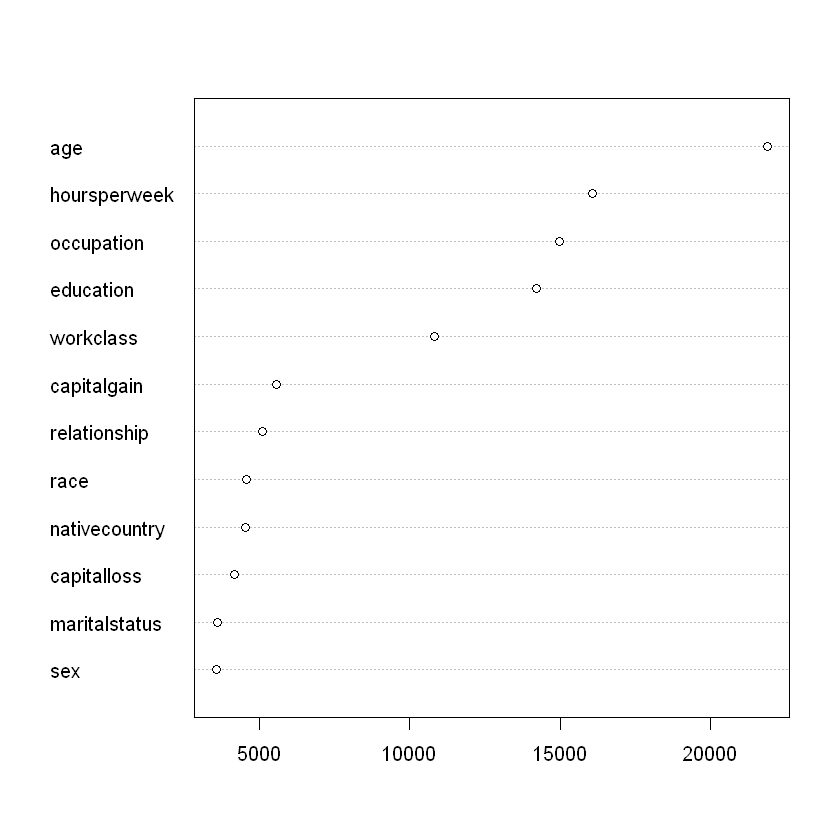

In [12]:
# Solution:
vu = varUsed(censusrf, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(censusrf$forest$xlevels[vusorted$ix]))

Based on the above, you can see that age is used significantly more than the other variables.

### Problem 3.3 - A Random Forest Model

A different metric we can look at is related to "impurity", which measures how homogenous each bucket or leaf of the tree is. In each tree in the forest, whenever we select a variable and perform a split, the impurity is decreased. Therefore, one way to measure the importance of a variable is to average the reduction in impurity, taken over all the times that variable is selected for splitting in all of the trees in the forest. To compute this metric, run the following command in R (replace "MODEL" with the name of your random forest model):

varImpPlot(MODEL)

Which one of the variables is the most important in terms of mean reduction in impurity?

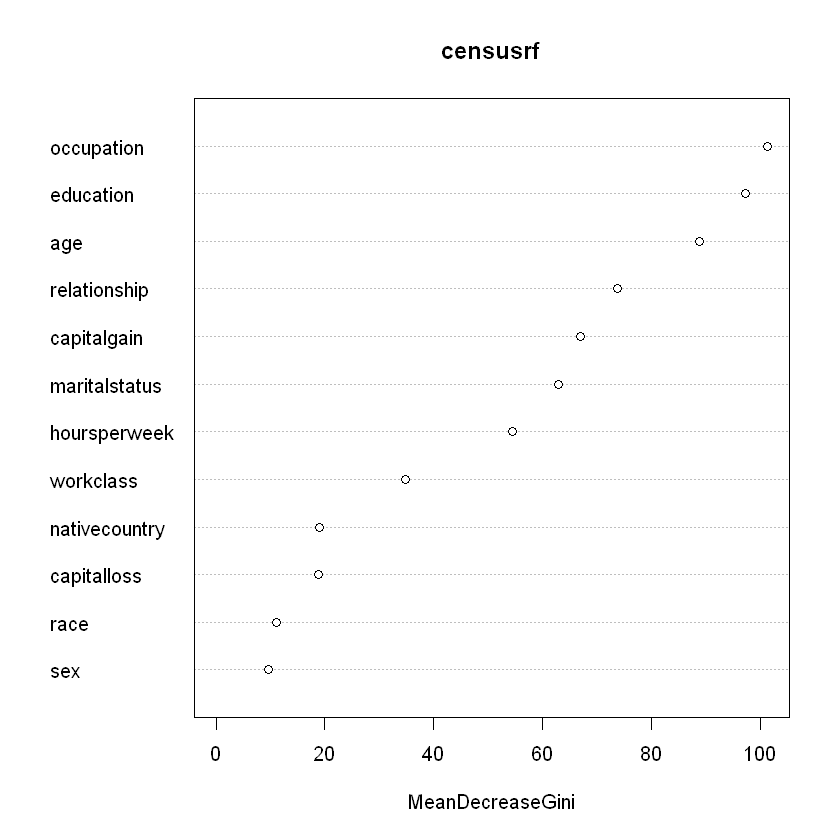

In [13]:
# Solution:
varImpPlot(censusrf)

The above suggests that the Occupation gives the largest reduction in impurity than the other variables.

The importance is measured by the average reduction in impurity.  Both age and occupation are important variables in both metrics explored above.  However, the order is different, as the importance measured by the number of times a variable is split is calculated differently.

### Problem 4.1 - Selecting cp by Cross-Validation

We now conclude our study of this data set by looking at how CART behaves with different choices of its parameters.

Let us select the cp parameter for our CART model using k-fold cross validation, with k = 10 folds. Do this by using the train function. Set the seed beforehand to 2. Test cp values from 0.002 to 0.1 in 0.002 increments, by using the following command:

cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

Also, remember to use the entire training set "train" when building this model. The train function might take some time to run.

Which value of cp does the train function recommend?

In [14]:
# Install package
install.packages('caret', repos='http://cran.us.r-project.org')
library(caret)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [16]:
install.packages('e1071', repos='http://cran.us.r-project.org', dependencies=TRUE)

also installing the dependencies 'mlbench', 'SparseM'



package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\a83644\AppData\Local\Temp\RtmpO6AbFF\downloaded_packages


In [17]:
# Solution:
set.seed(2)

# Specify use of k-fold cross validation with 10 folds:

fitControl = trainControl( method = "cv", number = 10 )

# Specify grid of cp values that we wish to evaluate:

cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

# Run the train function and view the result:

train( over50k ~ . , data = train, method = "rpart", trControl = fitControl, tuneGrid = cartGrid)

CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17268, 17269, 17269, 17269, 17268, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.002  0.8510972  0.55404931
  0.004  0.8482829  0.55537475
  0.006  0.8452078  0.53914084
  0.008  0.8442176  0.53817486
  0.010  0.8433317  0.53305978
  0.012  0.8433317  0.53305978
  0.014  0.8433317  0.53305978
  0.016  0.8413510  0.52349296
  0.018  0.8400480  0.51528594
  0.020  0.8381193  0.50351272
  0.022  0.8381193  0.50351272
  0.024  0.8381193  0.50351272
  0.026  0.8381193  0.50351272
  0.028  0.8381193  0.50351272
  0.030  0.8381193  0.50351272
  0.032  0.8381193  0.50351272
  0.034  0.8352011  0.48749911
  0.036  0.8326470  0.47340390
  0.038  0.8267570  0.44688035
  0.040  0.8248289  0.43893150
  0.042  0.8248289  0.43893150
  0.044  0.8248289  0.43893150
  0.046  0.8248289  0.43893150
  0.048  

The above output suggests that the best value was cp = 0.002, corresponding to the lowest cp value. If we look more closely at the accuracy at different cp values, we can see that it seems to be decreasing steadily as the cp value increases. Often, the cp value needs to become quite low before the accuracy begins to deteriorate.

### Problem 4.2 - Selecting cp by Cross-Validation

Fit a CART model to the training data using this value of cp. What is the prediction accuracy on the test set?

In [20]:
# Solution:
# Create a CART model

modelcartcp = rpart(over50k~., data=train, method="class", cp=0.002)

# Make predictions on the test set

predictTestcartcp = predict(modelcartcp, newdata=test, type="class")

# Generate confusion matrix with the command

table(test$over50k, predictTestcartcp)

# The accuracy is (see output below):
(9178+1838)/(9178+535+1240+1838)

        predictTestcartcp
          <=50K  >50K
   <=50K   9178   535
   >50K    1240  1838

[1] 0.8612306

### Problem 4.3 - Selecting cp by Cross-Validation

Compared to the original accuracy using the default value of cp, this new CART model is an improvement, and so we should clearly favor this new model over the old one -- or should we? Plot the CART tree for this model. How many splits are there?

Solution (see code cell below): There are 18 splits in diagram below.

This highlights one important tradeoff in building predictive models. By tuning cp, we improved our accuracy by over 1%, but our tree became significantly more complicated. In some applications, such an improvement in accuracy would be worth the loss in interpretability. In others, we may prefer a less accurate model that is simpler to understand and describe over a more accurate -- but more complicated -- model.

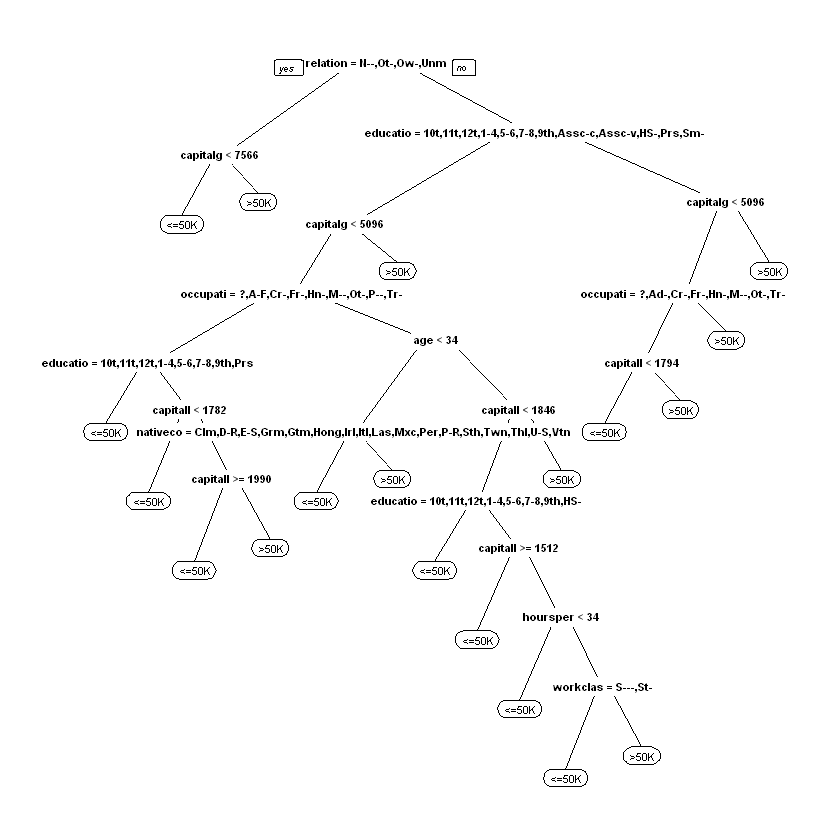

In [21]:
prp(modelcartcp)